# Import Libraries

In [1]:
# Basic Imports
import os
import sys
import numpy as np
import pandas as pd
import pickle
import string

curr_path = "../"
sys.path.append(curr_path)

import matplotlib.pyplot as plt
%matplotlib inline

# Project Imports
from config import path_config

# Import Labels file

In [2]:
label_input_filename = curr_path + path_config.PROJECT_DATA_LABELS_FILENAME + '.txt'

if os.path.exists(label_input_filename):
    with open(label_input_filename, 'r', encoding="utf-8", newline="\n") as f:
        label_string = f.read().split("\n")
else:
    print("File Not Found: %s ", label_input_filename)

In [3]:
label_string

["{0: 'tench, Tinca tinca',",
 " 1: 'goldfish, Carassius auratus',",
 " 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',",
 " 3: 'tiger shark, Galeocerdo cuvieri',",
 " 4: 'hammerhead, hammerhead shark',",
 " 5: 'electric ray, crampfish, numbfish, torpedo',",
 " 6: 'stingray',",
 " 7: 'cock',",
 " 8: 'hen',",
 " 9: 'ostrich, Struthio camelus',",
 " 10: 'brambling, Fringilla montifringilla',",
 " 11: 'goldfinch, Carduelis carduelis',",
 " 12: 'house finch, linnet, Carpodacus mexicanus',",
 " 13: 'junco, snowbird',",
 " 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',",
 " 15: 'robin, American robin, Turdus migratorius',",
 " 16: 'bulbul',",
 " 17: 'jay',",
 " 18: 'magpie',",
 " 19: 'chickadee',",
 " 20: 'water ouzel, dipper',",
 " 21: 'kite',",
 " 22: 'bald eagle, American eagle, Haliaeetus leucocephalus',",
 " 23: 'vulture',",
 " 24: 'great grey owl, great gray owl, Strix nebulosa',",
 " 25: 'European fire salamander, Salamandr

In [4]:
label_map = {}

for ele in label_string:
    label = ele.split(":")
    key = label[0].strip()
    if key[0] == "{":
        key = key[1:]
    
    key = key.strip("'")
    
    value = label[1].strip()
    if value[-1] == "," or value[-1] == "}":
        value = value[:-1]
    
    value = value.strip("'")
          
    label_map[int(key)] = value
    
label_map

{0: 'tench, Tinca tinca',
 1: 'goldfish, Carassius auratus',
 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 3: 'tiger shark, Galeocerdo cuvieri',
 4: 'hammerhead, hammerhead shark',
 5: 'electric ray, crampfish, numbfish, torpedo',
 6: 'stingray',
 7: 'cock',
 8: 'hen',
 9: 'ostrich, Struthio camelus',
 10: 'brambling, Fringilla montifringilla',
 11: 'goldfinch, Carduelis carduelis',
 12: 'house finch, linnet, Carpodacus mexicanus',
 13: 'junco, snowbird',
 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 15: 'robin, American robin, Turdus migratorius',
 16: 'bulbul',
 17: 'jay',
 18: 'magpie',
 19: 'chickadee',
 20: 'water ouzel, dipper',
 21: 'kite',
 22: 'bald eagle, American eagle, Haliaeetus leucocephalus',
 23: 'vulture',
 24: 'great grey owl, great gray owl, Strix nebulosa',
 25: 'European fire salamander, Salamandra salamandra',
 26: 'common newt, Triturus vulgaris',
 27: 'eft',
 28: 'spotted salamander, Ambystoma 

# Export Labels as dictionary

In [5]:
label_map_filename = curr_path + path_config.PROJECT_DATA_LABELS_FILENAME + '.pkl'
pickle.dump(label_map, open(label_map_filename, "wb"))

In [6]:
label_map = pickle.load(open(label_map_filename, "rb"))
label_map

{0: 'tench, Tinca tinca',
 1: 'goldfish, Carassius auratus',
 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 3: 'tiger shark, Galeocerdo cuvieri',
 4: 'hammerhead, hammerhead shark',
 5: 'electric ray, crampfish, numbfish, torpedo',
 6: 'stingray',
 7: 'cock',
 8: 'hen',
 9: 'ostrich, Struthio camelus',
 10: 'brambling, Fringilla montifringilla',
 11: 'goldfinch, Carduelis carduelis',
 12: 'house finch, linnet, Carpodacus mexicanus',
 13: 'junco, snowbird',
 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 15: 'robin, American robin, Turdus migratorius',
 16: 'bulbul',
 17: 'jay',
 18: 'magpie',
 19: 'chickadee',
 20: 'water ouzel, dipper',
 21: 'kite',
 22: 'bald eagle, American eagle, Haliaeetus leucocephalus',
 23: 'vulture',
 24: 'great grey owl, great gray owl, Strix nebulosa',
 25: 'European fire salamander, Salamandra salamandra',
 26: 'common newt, Triturus vulgaris',
 27: 'eft',
 28: 'spotted salamander, Ambystoma 

# Import Sample data

In [7]:
def read_pickle(file):
    with open(file, 'rb') as f:
        images = pickle.load(f, errors='ignore')
    return images

In [8]:
def load_dataset(curr_path, stage, index):
    
    stage_path = ""
    
    if stage == "train":
        stage_path = "train/Imagenet32/train_data_batch_"
    if stage == "test":
        stage_path = "test/Imagenet32/test_data_batch_"
    if stage == "val":
        stage_path = "val/Imagenet32/val_data_batch_"
        
    data_file_path = curr_path + path_config.PROJECT_DATA_RAW_PATH + stage_path + str(index)
    if os.path.exists(data_file_path):
        images = read_pickle(data_file_path)
    else:
        print("File Not Found: %s", data_file_path)
        return False
    
    data = images["data"]
    labels = images["labels"]
    mean_images = images["mean"]
    
    # Convert Labels from 1-1000 to 0-999 range
    labels = [label - 1 for label in labels]
    
    # Based on the Paper
    data = data / np.float32(255)
    mean_images = mean_images / np.float32(255)
    
    # Dataset size
    n_records = len(data)
    
    # data = data - mean_images
    
    # Image shape
    img_size = int(np.sqrt(len(data[0]) / 3))
    img_size_2 = int(img_size * img_size)
    
    X = np.dstack((data[:, :img_size_2], data[:, img_size_2:img_size_2*2], data[:, img_size_2*2:]))
    X = X.reshape((n_records, img_size, img_size, 3))
    
    X_train = X[0: n_records, :, :, :]
    y_train = labels[0: n_records]
    
    return X_train, y_train

In [9]:
images, labels = load_dataset(curr_path, "train", 1)

In [10]:
images.shape

(128116, 32, 32, 3)

In [11]:
len(labels)

128116

# Sample Image

In [12]:
sample_number = 2002

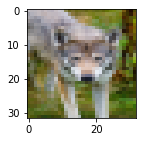

In [13]:
plt.figure(figsize=(2, 2))
plt.imshow(images[sample_number])
plt.show()

In [14]:
labels[sample_number]

204

In [15]:
label_map[labels[sample_number]]

'Lhasa, Lhasa apso'